# 第３章 流星の力学

- 流星とは太陽系を浮遊する粒子が地球の大気に突入する際に観測される。
  - 大気との摩擦や衝突で加熱され、蒸発される。
  - 蒸発する際の熱の一部が流星体の経路上の電子を電離する。
  - この電離した電子とイオンが再結合する際に光が放出される。
  - 燃え尽きず、地上に残ったものを隕石という。
- 光度曲線を物理方程式から再現したい。

## 数式

![note_3_1](./pic/note_3_1.jpg)
![note_3_2](./pic/note_3_2.jpg)


time	x	y	u	v	m
0.0e+00	0.0e+00	1.6e+07	2.0e+06	-4.0e+06	1.0e+00
1.0e-01	1.0e+05	1.6e+07	2.0e+06	-4.0e+06	1.0e+00
1.0e-01	1.0e+05	1.6e+07	2.0e+06	-4.0e+06	1.0e+00
2.0e-01	2.0e+05	1.6e+07	2.0e+06	-4.0e+06	1.0e+00
2.0e-01	2.0e+05	1.6e+07	2.0e+06	-4.0e+06	1.0e+00
3.0e-01	3.0e+05	1.5e+07	2.0e+06	-4.0e+06	1.0e+00
3.0e-01	3.0e+05	1.5e+07	2.0e+06	-4.0e+06	1.0e+00
4.0e-01	4.0e+05	1.5e+07	2.0e+06	-4.0e+06	1.0e+00
4.0e-01	4.0e+05	1.5e+07	2.0e+06	-4.0e+06	1.0e+00
5.0e-01	5.0e+05	1.5e+07	2.0e+06	-4.0e+06	1.0e+00
5.0e-01	5.0e+05	1.5e+07	2.0e+06	-4.0e+06	1.0e+00
6.0e-01	6.0e+05	1.5e+07	2.0e+06	-4.0e+06	1.0e+00
6.0e-01	6.0e+05	1.5e+07	2.0e+06	-4.0e+06	1.0e+00
7.0e-01	7.0e+05	1.5e+07	2.0e+06	-4.0e+06	1.0e+00
7.0e-01	7.0e+05	1.5e+07	2.0e+06	-4.0e+06	1.0e+00
8.0e-01	8.0e+05	1.4e+07	2.0e+06	-4.0e+06	1.0e+00
8.0e-01	8.0e+05	1.4e+07	2.0e+06	-4.0e+06	1.0e+00
9.0e-01	9.0e+05	1.4e+07	2.0e+06	-4.0e+06	1.0e+00
9.0e-01	9.0e+05	1.4e+07	2.0e+06	-4.0e+06	1.0e+00
1.0e+00	1.0e+06	1.4e+07	2.0e+06	-4.0e+06	1.0e+00
1.0e+

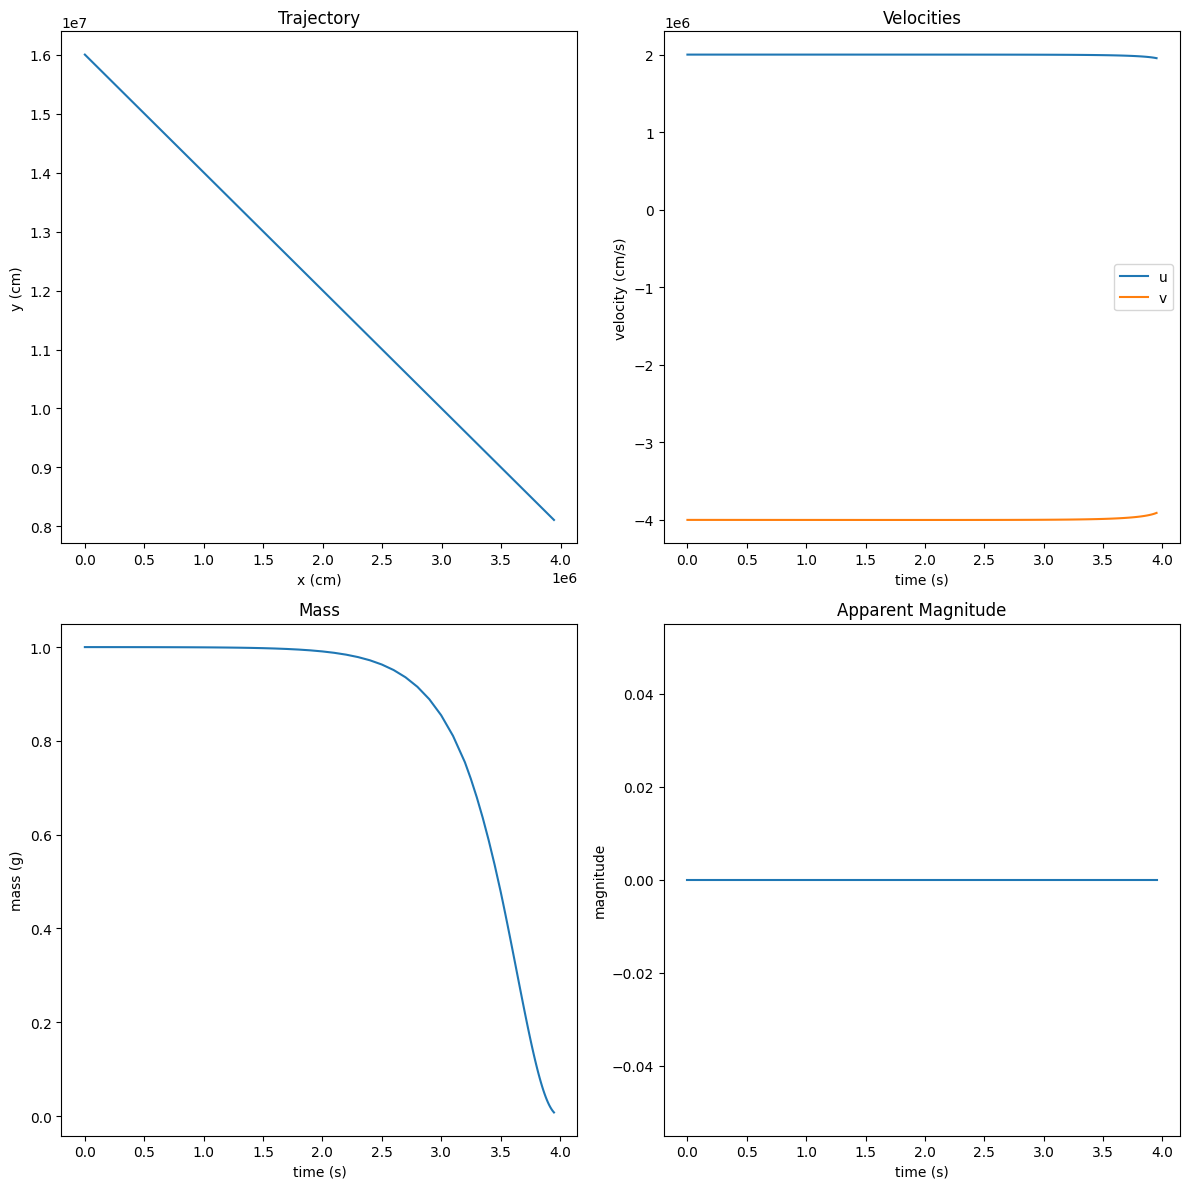

In [2]:
from astrophysics.meteorite.meteorite import Meteorite

y0_array = [1.6e7, 1.4e7]       # [cm] (1e7 cm = 100 km)
u0_array = [2e6, 1e6]           # [cm/s] (1e6 cm/s = 10 km/s)
v0_array = [-4e6, -6e6, -3e6]   # [cm/s] (1e6 cm/s = 10 km/s)
mass0_array = [1, 0.01, 1.00]   # [g]
k1_array = [1, 0.8]       
k2_array = [1e-11, 5e-11]
tau_array = [0.02, 0.01]

for y0 in y0_array:
    for u0 in u0_array:
        for v0 in v0_array:
            for mass0 in mass0_array:
                for k1 in k1_array:
                    for k2 in k2_array:
                        for tau in tau_array:
                            meteorite = Meteorite(y0, u0, v0, mass0, k1, k2, tau)
                            meteorite.calc()
                            df = meteorite.to_dataframe()
                            df.to_csv('meteorite.csv', index=False)
                            meteorite.plot()
                            break
                        break
                    break
                    
                break
            break
        break
    break


In [1]:
from math import exp, sqrt, log
from dataclasses import dataclass

print("流星の力学")
print("初期条件とパラメータを入力 : ")
print("初期高度 (km) : ")
y = float(input())
print("初期速度(水平方向)[km/s] : ")
u = float(input())
print("初期速度(鉛直方向)[km/s] : ")
v = float(input())
print("初期質量[g] : ")
m = float(input())
print("パラメータK1 :")
k1 = float(input())
print("パラメータK2 :")
k2 = float(input())
print("パラメータ tau:")
tau = float(input())

# 単位をkm → cm
y = y * 1.0e5
x = 0
u = u * 1.0e5
v = - abs(v * 1.0e5)
minit = m
t = 0
i = 1

def datm(y: float) -> float:
    """大気密度の計算"""
    return exp(-6.65125 - 1.39813e-6 * y)

@dataclass
class Effes:
    fx: float
    fy: float
    fu: float
    fv: float
    fm: float
    s: float
    rho: float

def effes(_x: float, y: float, u: float, v: float, m: float, k1: float, k2: float) -> Effes:
    """"""
    rho = datm(y)
    s = sqrt(u**2 + v**2)
    return Effes(
        fx = u,
        fy = v,
        s = s,
        rho = rho,
        fu = -k1 * rho * s * u * exp(-1 / 3 * log(m)),
        fv = -k1 * rho * s * v * exp(-1 / 3 * log(m)) - 980,
        fm = -k2 * rho * s**3 * exp(2/3 * log(m))
    )


print()
# print("i\tt\tx\ty\tu\tv\tmass\tmag")

while True:
    if m > 0.8 * minit:
        dt = 0.1
    elif m > 0.5 * minit:
        dt = 0.05
    elif m > 0.35 * minit:
        dt = 0.02
    else:
        dt = 0.01
    t += dt

    effes1 = effes(x, y, u, v, m, k1, k2)

    x1 = dt * effes1.fx
    y1 = dt * effes1.fy
    u1 = dt * effes1.fu
    v1 = dt * effes1.fv
    m1 = dt * effes1.fm
    rho1 = datm(y1)
    s1 = sqrt(u1**2 + v1**2)

    print(x1, y1, u1, v1, m1, rho1, s1)

    effes2 = effes(x1, y1, u1, v1, m1, k1, k2)

    x = x + 0.5 * dt * (effes1.fx + effes2.fx)
    y = y + 0.5 * dt * (effes1.fy + effes2.fy)
    u = u + 0.5 * dt * (effes1.fu + effes2.fu)
    v = v + 0.5 * dt * (effes1.fv + effes2.fv)
    m = m + 0.5 * dt * (effes1.fm + effes2.fm)

    e = -0.5 * tau * effes2.fm * s1**2
    mag = 5 * log(y) / log(10)  - 2.5 * log(e) / log(10) - 8.795
    
    if y > 0:
        print(f"{i} {t:.02} {x / 1e5:.04} {y} {u} {v} {m} {mag}")
    else:
        print()
        print("地上に落下しました")
        m = 0
    i += 1
    if i % 15 == 0 :
        print()
        print("Press any key to conitinue")
        x = input()

    if m < minit * 0.01:
        break



流星の力学
初期条件とパラメータを入力 : 
初期高度 (km) : 


ValueError: could not convert string to float: ''